# Load Packages

In [1]:
using Printf, Dates, Statistics, CSV, DataFrames
include("jlFiles/printmat.jl")

printyellow (generic function with 1 method)

# Loading Some Data with CSV.jl

In [2]:
DataFile = "Data/Options_prices_US_Canada.csv"

println("The first 4 lines of $(DataFile):\n")
txt = readlines(DataFile)
printmat(txt[1:4])

The first 4 lines of Data/Options_prices_US_Canada.csv:

symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,bid,volume,open interest,unadjusted
SPX,CBOE,03/30/17,2368.06,SPXW  170331C00300000,03/31/17,300,C,E,2073.9,2062.9,0,0,2368.927
SPX,CBOE,03/30/17,2368.06,SPXW  170331P00300000,03/31/17,300,P,E,0.1,0,0,0,2368.927
SPX,CBOE,03/30/17,2368.06,SPXW  170331C00400000,03/31/17,400,C,E,1974.1,1962.7,0,0,2368.927



Use `normalizenames` to get names that can be used in Julia as variables names and specify the `dateformat` used in the csv file (to convert to proper Julia dates). The dates in the file are given as `03/30/17` which CSV/DataFrames interpret as 30 March year 17 (AD). We add `Dates.Year(2000)` to get year 2017.

In [3]:
df1 = CSV.read(DataFile,DataFrame,normalizenames=true,dateformat="mm/dd/yy")

df1.date       .+= Dates.Year(2000)     #03/30/17 to 03/30/2017
df1.expiration .+= Dates.Year(2000)

select!(df1,Not([:exchange,:option_symbol,:style,:unadjusted]))  #deleting some columns
rename!(df1,:adjusted_close => :close)          #renaming a column

show(df1)

13952×10 DataFrame
   Row │ symbol   date        close    expiration  strike   call_put  ask      ⋯
       │ String3  Date        Float64  Date        Float64  String1   Float64  ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │ SPX      2017-03-30  2368.06  2017-03-31    300.0  C         2073.9   ⋯
     2 │ SPX      2017-03-30  2368.06  2017-03-31    300.0  P            0.1
     3 │ SPX      2017-03-30  2368.06  2017-03-31    400.0  C         1974.1
     4 │ SPX      2017-03-30  2368.06  2017-03-31    400.0  P            0.05
     5 │ SPX      2017-03-30  2368.06  2017-03-31    500.0  C         1874.1   ⋯
     6 │ SPX      2017-03-30  2368.06  2017-03-31    500.0  P            0.05
     7 │ SPX      2017-03-30  2368.06  2017-03-31    600.0  C         1774.1
     8 │ SPX      2017-03-30  2368.06  2017-03-31    600.0  P            0.05
     9 │ SPX      2017-03-30  2368.06  2017-03-31    700.0  C         1673.9   ⋯
    10 │ SPX      2017-03-30  

# Task 1

Create a new DataFrame that contains only the data for SPX and those option contracts that were traded (volume > 0). Hint: `df1[vv, :]` picks out the rows of the data frame for which `vv` is `true`. 

In [4]:
vv = (df1.symbol .== "SPX") .& (df1.volume .> 0)   #rows with SPX, and trade

df2 = df1[vv, :]        #create new df, only some rows

show(df2)

2359×10 DataFrame
  Row │ symbol   date        close    expiration  strike   call_put  ask       ⋯
      │ String3  Date        Float64  Date        Float64  String1   Float64   ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ SPX      2017-03-30  2368.06  2017-03-31   1600.0  C          774.0    ⋯
    2 │ SPX      2017-03-30  2368.06  2017-03-31   1600.0  P            0.05
    3 │ SPX      2017-03-30  2368.06  2017-03-31   2040.0  P            0.05
    4 │ SPX      2017-03-30  2368.06  2017-03-31   2050.0  P            0.05
    5 │ SPX      2017-03-30  2368.06  2017-03-31   2100.0  P            0.05   ⋯
    6 │ SPX      2017-03-30  2368.06  2017-03-31   2110.0  C          264.5
    7 │ SPX      2017-03-30  2368.06  2017-03-31   2120.0  P            0.05
    8 │ SPX      2017-03-30  2368.06  2017-03-31   2150.0  P            0.05
    9 │ SPX      2017-03-30  2368.06  2017-03-31   2175.0  C          199.5    ⋯
   10 │ SPX      2017-03-30  2368.0

# Task 2

Create a *group* for each expiration date. These groups can be referred to as `dataG2[key]`.

Hints: `groupby()`

In [5]:
dataG2 = groupby(df2,:expiration);    #grouped by expiration date

# Task 3

Print the number of contracts (`nrow`) and the sum of the open interest `:open_interest=>sum` for each of the expiration dates.

Hint: `combine()`

In [6]:
combine(dataG2,nrow,:open_interest=>sum)    #same information as above, uncomment to se

34×3 DataFrame
 Row │ expiration  nrow   open_interest_sum 
     │ Date        Int64  Int64             
─────┼──────────────────────────────────────
   1 │ 2017-03-31    100            1010183
   2 │ 2017-04-03     94             109345
   3 │ 2017-04-05     84             102022
   4 │ 2017-04-07    140             467105
   5 │ 2017-04-10     73              51755
   6 │ 2017-04-12     67              56228
   7 │ 2017-04-13    109             303944
   8 │ 2017-04-17     70              40855
   9 │ 2017-04-19     57              25690
  10 │ 2017-04-21    166            1775684
  11 │ 2017-04-24     69              15085
  ⋮  │     ⋮         ⋮            ⋮
  25 │ 2017-09-15     45             524556
  26 │ 2017-09-29     17              45842
  27 │ 2017-12-15     46             759858
  28 │ 2017-12-29     22              35398
  29 │ 2018-01-19     18              78967
  30 │ 2018-03-16     16              15051
  31 │ 2018-03-29      9                153
  32 │ 2018-06-15     17              69132
  33 │ 2018-12-21     27             179774
  34 │ 2019-12-20     13               9213
                             13 rows omitted

# Task 4 
Creating two new DataFrames: for expiration date 2017-04-21 and another for 2017-06-16.

Hint: `dataG2[(expiration = Date("2017-04-21"),)]`

In [7]:
#creating two new DataFrames: for two different expiration days

df_20170421 = dataG2[(expiration = Date("2017-04-21"),)]
df_20170616 = dataG2[(expiration = Date("2017-06-16"),)]

println()

# Task 5

For the expiration date 2017-04-21, calculate the mid price as the average of the `.ask` and `.bid`. 

Plot the mid price as a function of the strike price `.strike` for put options. Add a curve another curve for the call options.

In [8]:
using Plots                 #this loads the Plots package

#pyplot(size=(600,400))    #choice of plotting backend
gr(size=(480,320))
default(fmt = :svg)  

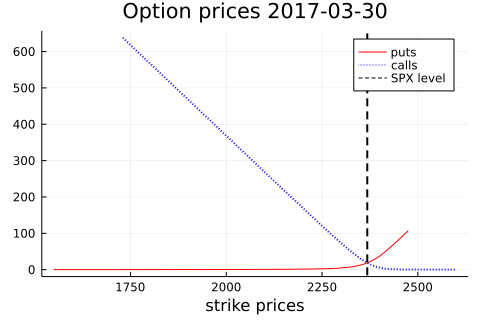

In [9]:
vv_P = df_20170421.call_put .== "P"   #put options
vv_C = df_20170421.call_put .== "C"   #call options

midPrice = (df_20170421.ask + df_20170421.bid)/2    #creates a traditional vector

p1 = plot( df_20170421.strike[vv_P],midPrice[vv_P],label="puts",
           linecolor = :red,
           linestyle = :solid,
           linewidth = 1,
           title = "Option prices $(df_20170421.date[1])",
           xlabel = "strike prices" )
plot!( df_20170421.strike[vv_C],midPrice[vv_C],label="calls",
           linecolor = :blue,
           linestyle = :dot,
           linewidth = 2 )
vline!([df_20170421.close[1]],linecolor=:black,line=(:dash,2),label="SPX level")
display(p1)